In [1]:
import LanusStats as ls
import matplotlib.pyplot as plt
import ternary
import pandas as pd
from scipy import stats

In [2]:
fbref = ls.Fbref()

In [3]:
ls.get_available_leagues('Fbref')

['Copa de la Liga',
 'Primera Division Argentina',
 'Primera Division Uruguay',
 'Brasileirao',
 'Brasileirao B',
 'Primera Division Colombia',
 'Primera Division Chile',
 'Primera Division Peru',
 'Primera Division Venezuela',
 'Primera Division Ecuador',
 'Primera Division Bolivia',
 'Primera Division Paraguay',
 'Brasileirao F',
 'MLS',
 'USL Championship',
 'Premier League',
 'La Liga',
 'Ligue 1',
 'Bundesliga',
 'Serie A',
 'Big 5 European Leagues',
 'Danish Superliga',
 'Eredivise',
 'Primeira Liga Portugal',
 'Primera Division Mexico']

In [ ]:
df = fbref.get_all_player_season_stats('Big 5 European Leagues', '2023-2024')

In [4]:
df = pd.read_csv('big5.csv')

In [6]:
df.shape

(2852, 239)

In [9]:
list(df.columns)

['Unnamed: 0',
 'Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls.1',
 'stats_Ast.1',
 'stats_G+A.1',
 'stats_G-PK.1',
 'stats_G+A-PK',
 'stats_xG.1',
 'stats_xAG.1',
 'stats_xG+xAG',
 'stats_npxG.1',
 'stats_npxG+xAG.1',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 '

In [10]:
stat1 = 'passing_PrgP'
stat2 = 'stats_PrgC'
stat3 = 'gca_SCA90'

In [13]:
df[['stats_90s']].describe()

,stats_90s
count,2852.000000
mean,13.482328
std,10.685045
min,0.000000
25%,3.300000
50%,12.400000
75%,22.100000
max,38.000000


In [16]:
df = df[(df['stats_90s'] > 10) & (df['stats_Pos'].str.contains('DF'))].reset_index(drop=True)

In [18]:
player_list = list(df['Player'])
team_list = list(df['stats_Squad'])

In [21]:
points = []
colors = []

# Now we calculate the percentile rankings of all players individually
for i in range(0,len(df)):
    player_name = player_list[i]
    team = team_list[i]
    
    player = df[(df['Player']==player_name) & (df['stats_Squad']==team)]
    x1 = player[stat1].values[0]
    x2 = player[stat2].values[0]
    x3 = player[stat3].values[0]
    pct1 = stats.percentileofscore(df[stat1],x1)
    pct2 = stats.percentileofscore(df[stat2],x2)
    pct3 = stats.percentileofscore(df[stat3],x3)
    
    # This creates the coordinates of the player. Each stat's score as a % of their total score. That's the logic behind ternary plots at their basic form
    pct1_n = pct1/(pct1+pct2+pct3)*100
    pct2_n = pct2/(pct1+pct2+pct3)*100
    pct3_n = pct3/(pct1+pct2+pct3)*100
    
    # The total sum of a player's percentile ranking (out of 300) is their point's color
    col = pct1+pct2+pct3

    # Add each player's info to those blank dfs we initialized above
    points.append((pct1_n,pct2_n,pct3_n))
    colors.append(col)

(-5.0, 105.0, -10.0, 90.0)

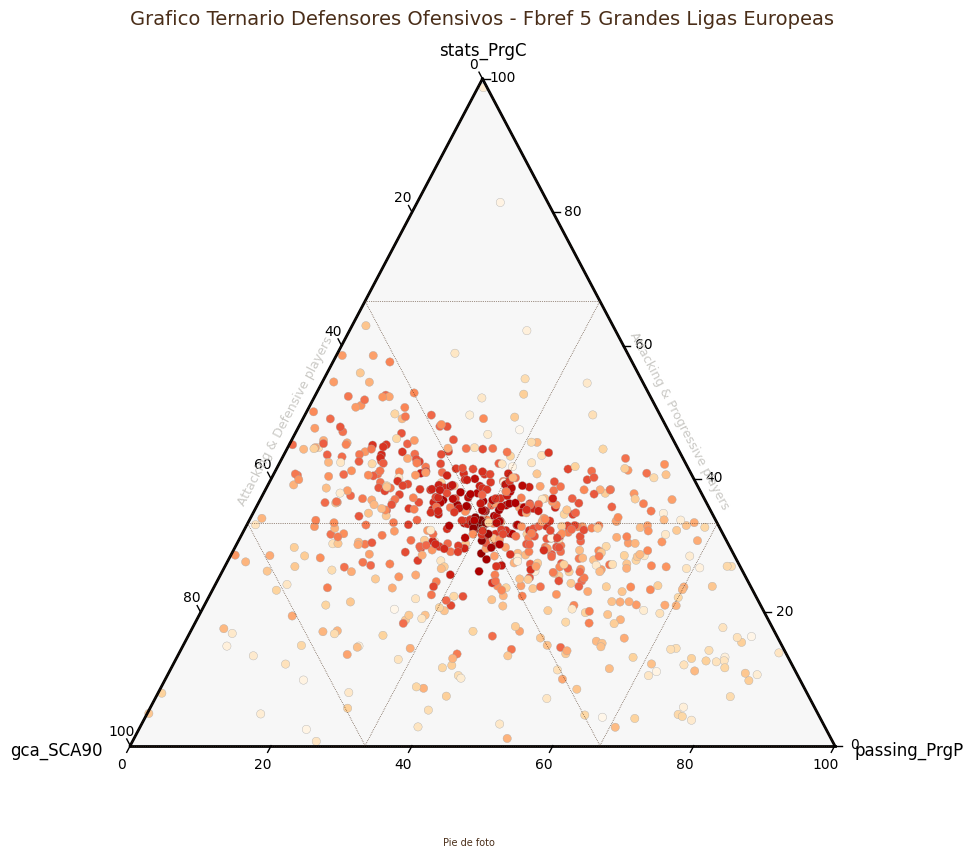

In [34]:
mult = 33.3333333
scale = 100
fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(10, 10)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=mult, color="#4A2E19")
tax.scatter(points,
            edgecolors='darkgrey', linewidths=.25,
            c=colors, cmap='OrRd', # Change the 'cmap' if you want to use a different matplotlib color map.
            vmin=min(colors), vmax=max(colors),
            label=player_list,
           )
tax.set_title("Grafico Ternario Defensores Ofensivos - Fbref 5 Grandes Ligas Europeas",
              fontsize=14, color='#4A2E19', pad = 20)

tax.right_corner_label(stat1, fontsize=12, offset=.2)
tax.top_corner_label(stat2, fontsize=12, offset=.15)
tax.left_corner_label(stat3, fontsize=12, offset=.2)

tax.left_axis_label("Attacking & Defensive players", fontsize=9, offset=.05, color='#cac9c5')
tax.right_axis_label("Attacking & Progressive players", fontsize=9, offset=.05, color='#cac9c5')

tax.bottom_axis_label("Pie de foto",
                      fontsize=7, offset=.07,
                     color='#4A2E19')
tax.ticks(axis='lbr', linewidth=1, multiple=20)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#for i, txt in enumerate(points):
#    tax.annotate(player_list[i], points[i], fontsize=6,
#                     color='black')